In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


In [2]:
ratings =pd.read_csv("../input/the-movies-dataset/ratings_small.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [3]:
ratings.shape

(100004, 4)

In [4]:
movies =  pd.read_csv("../input/the-movies-dataset/movies_metadata.csv")
movies.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
movies.shape

(45466, 24)

In [6]:
pd.crosstab(ratings.userId, ratings.movieId).head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
n_users = ratings['userId'].nunique()
n_users

671

In [8]:
n_movies = ratings['movieId'].nunique()
n_movies

9066

In [9]:
min_rating = min(ratings['rating'])
max_rating = max(ratings['rating'])
min_rating, max_rating

(0.5, 5.0)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
user_enc = LabelEncoder()
ratings['user'] = user_enc.fit_transform(ratings.userId.values)
item_enc = LabelEncoder()
ratings['movie'] = user_enc.fit_transform(ratings.movieId.values)
X = ratings[['user', 'movie']].values
y = ratings['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(70002, 2) (70002,)
(30002, 2) (30002,)


In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import regularizers
from tensorflow.keras import metrics
from tensorflow.keras.utils import plot_model

2022-06-04 16:47:11.331239: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_id (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
movie_id (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 50)        33550       user_id[0][0]                    
__________________________________________________________________________________________________
movie_embedding (Embedding)     (None, 1, 50)        453300      movie_id[0][0]                   
______________________________________________________________________________________________

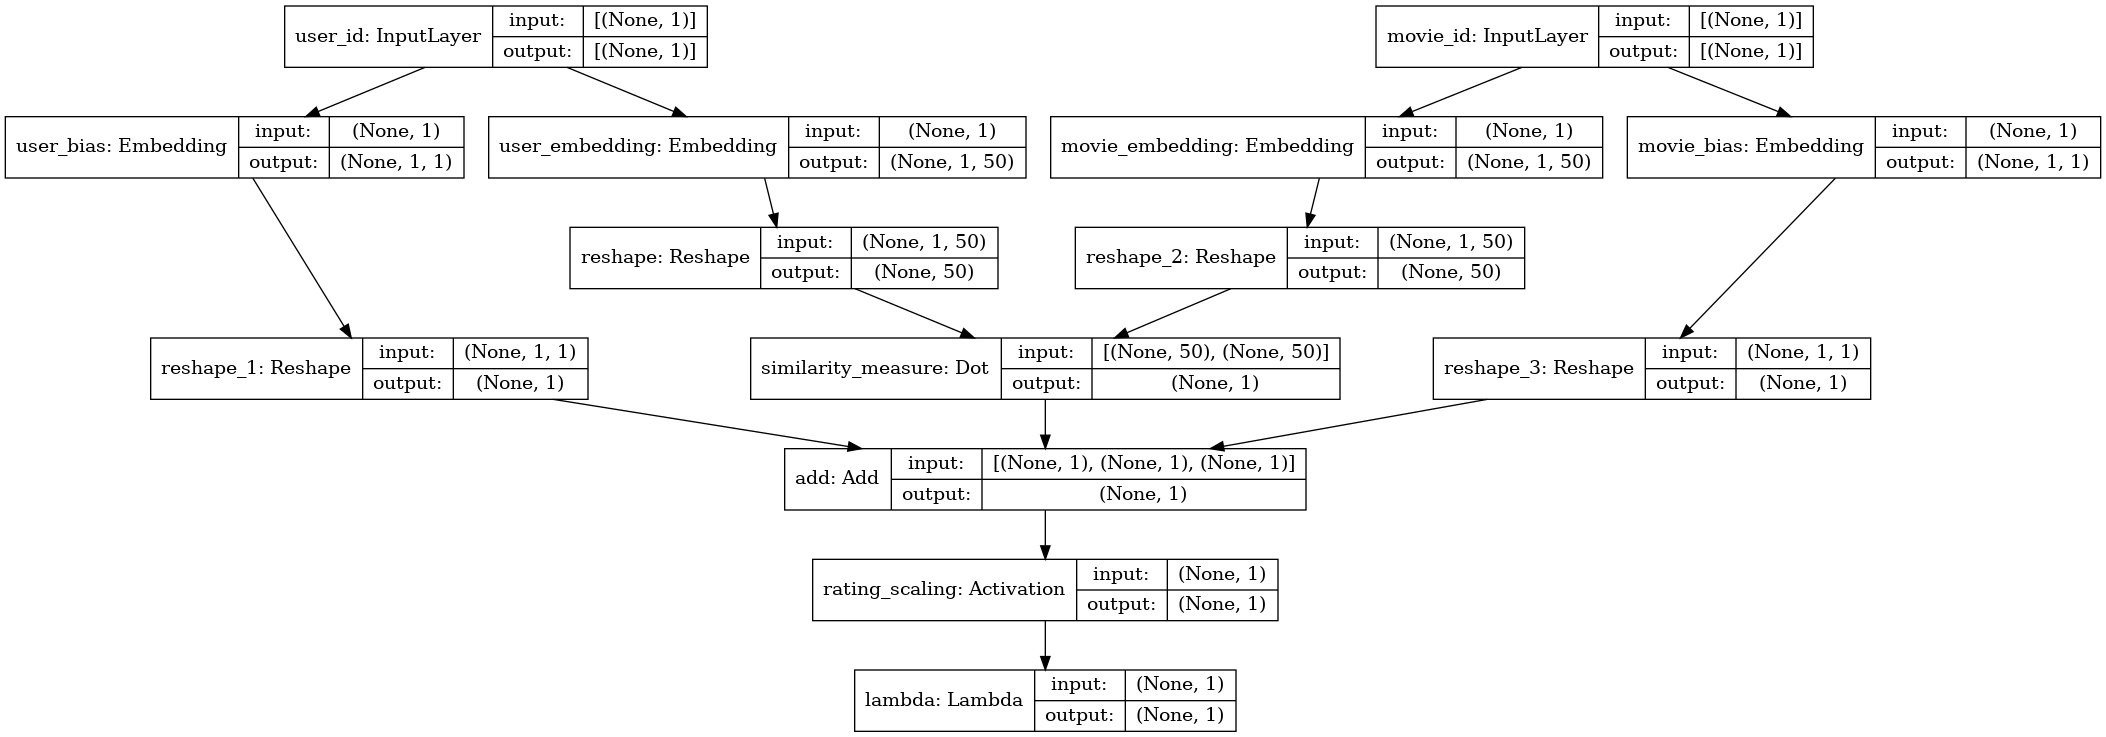

In [12]:
# Number of latent factors
emb_sz = 50

# User embeddings
user = layers.Input(shape=(1),name='user_id')
user_emb = layers.Embedding(n_users, emb_sz,
                            embeddings_regularizer=regularizers.l2(1e-6),
                            name='user_embedding')(user)
user_emb = layers.Reshape((emb_sz,))(user_emb)

# User bias
user_bias = layers.Embedding(n_users, 1,
                             embeddings_regularizer=regularizers.l2(1e-6),
                             name='user_bias')(user)
user_bias = layers.Reshape((1,))(user_bias)

# Movie embeddings
movie = layers.Input(shape=(1,),name='movie_id')
movie_emb = layers.Embedding(n_movies, emb_sz,
                             embeddings_regularizer=regularizers.l2(1e-6),
                             name='movie_embedding')(movie)
movie_emb = layers.Reshape((emb_sz,))(movie_emb)

# Movie bias
movie_bias = layers.Embedding(n_movies, 1, 
                              embeddings_regularizer=regularizers.l2(1e-6),
                              name='movie_bias')(movie)
movie_bias = layers.Reshape((1,))(movie_bias)

# Dot product
rating = layers.Dot(axes=1,name='similarity_measure')([user_emb, movie_emb])

# Add biases
rating = layers.Add()([rating, user_bias, movie_bias])
rating = layers.Activation('sigmoid',name='rating_scaling')(rating)
rating = layers.Lambda(lambda x:x*(max_rating - min_rating) + min_rating)(rating)

# Model
model = models.Model([user, movie], rating)

# Compile the model
model.compile(loss='mse', metrics=metrics.RootMeanSquaredError(),
              optimizer=optimizers.Adam(lr=0.001))

# Show model summary
print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

In [13]:
model.fit(x=[X_train[:,0], X_train[:,1]], y=y_train,
          batch_size=64, epochs=5, verbose=1,
          validation_data=([X_test[:,0], X_test[:,1]], y_test))

2022-06-04 16:47:12.781804: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1094/1094 [==============================] - 7s 5ms/step - loss: 1.3817 - root_mean_squared_error: 1.1753 - val_loss: 1.0063 - val_root_mean_squared_error: 1.0027
Epoch 2/5
1094/1094 [==============================] - 5s 5ms/step - loss: 0.8118 - root_mean_squared_error: 0.9000 - val_loss: 0.8167 - val_root_mean_squared_error: 0.9024
Epoch 3/5
1094/1094 [==============================] - 5s 5ms/step - loss: 0.6059 - root_mean_squared_error: 0.7764 - val_loss: 0.7835 - val_root_mean_squared_error: 0.8830
Epoch 4/5
1094/1094 [==============================] - 5s 5ms/step - loss: 0.4619 - root_mean_squared_error: 0.6764 - val_loss: 0.7834 - val_root_mean_squared_error: 0.8822
Epoch 5/5
1094/1094 [==============================] - 5s 5ms/step - loss: 0.3558 - root_mean_squared_error: 0.5917 - val_loss: 0.7930 - val_root_mean_squared_error: 0.8870


In [14]:
user = [50]
movie = [300]
user= np.expand_dims(user,1)
movie= np.expand_dims(user,1)

In [15]:
y_pred=model.predict(x=[user,movie])
y_pred

array([[3.099443]], dtype=float32)

In [16]:
ratings.head()

,userId,movieId,rating,timestamp,user,movie
0,1,31,2.5,1260759144,0,30
1,1,1029,3.0,1260759179,0,833
2,1,1061,3.0,1260759182,0,859
3,1,1129,2.0,1260759185,0,906
4,1,1172,4.0,1260759205,0,931


In [17]:
m = ratings[ratings['user']== 50]
m

,userId,movieId,rating,timestamp,user,movie
8033,51,913,4.0,974729137,50,734
8034,51,1636,1.0,974728763,50,1302
8035,51,1888,3.0,974728763,50,1459
8036,51,1948,4.0,974728763,50,1510
8037,51,1959,4.0,974729199,50,1521
8038,51,1968,4.0,974728763,50,1530
8039,51,2369,3.0,974728999,50,1879
8040,51,2396,2.0,974729270,50,1906
8041,51,2605,5.0,974729067,50,2084
8042,51,2670,5.0,974729270,50,2137
